# SC1015 DSAI Project:
### [Toxic Comment Classification Challenge Dataset from Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview)

In [155]:
## Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf
from textblob import TextBlob,Word
from matplotlib.ticker import PercentFormatter

## Setup : Import the Dataset
The dataset `train.csv` is in CSV format, hence we use the `read_csv` function from Pandas, and take a quick look at the data using the head function.

In [156]:
df = pd.read_csv("train.csv")
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\r\nWhy the edits made under my use...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

Entries with all 0 under the 6 categories are considered as non-toxic.</br> 

In [4]:
# Check the shape of object type in the dataset using the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Data Cleaning

check null value in dataset, need to clean dataset if there is missing values

In [30]:
#find the null values of the df
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
sentiment        0
dtype: int64

Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'

In [157]:
import re
import string

# Remove all '\n' in the string and replace it with a space
def rm_breakline(x): return re.sub("\n", " ", x)


# Remove all non-ascii characters
def rm_non_ascii(x): return re.sub(r'[^\x00-\x7f]', r' ', x)

# Convert all capital letters to lowercase
def to_lowercase(x): return x.lower()

# Apply all the lambda functions previously written through .map on the comments column
df['comment_text'] = df['comment_text'].map(
    rm_breakline).map(rm_non_ascii).map(to_lowercase)

df.head()


id                                       comment_text  toxic  \
0  0000997932d777bf  explanation\r why the edits made under my user...      0   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...      0   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...      0   
3  0001b41b1c6bb37e  "\r more\r i can't make any real suggestions o...      0   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

make sure columns: toxic, severe_toxic, obscene, threat, insult, and identity_hate have no other value other than 0 and 1

In [32]:
print("Max Value")
#find the max value to every column
print(df[df.columns[2:8]].max())
print("\nMin Value")
#find the min value to every column
print(df[df.columns[2:8]].min())
#find the distinct value of every column
print("\nDistinct Value of all column")
print(pd.unique(df[df.columns[2:8]].values.ravel()))

Max Value
toxic            1
severe_toxic     1
obscene          1
threat           1
insult           1
identity_hate    1
dtype: int64

Min Value
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Distinct Value of all column
[0 1]


number of rows that have 1 in more that 1 category eg. comment id:0002bcb3da6cb337 under toxic,severe toxic,obscene,insult

In [33]:
len(df[(df.iloc[:, 2:8] == 1).sum(axis=1) > 1])

9865

## Exploratory Data Analysis

In [5]:
df[2:]

id                                       comment_text  \
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5       00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
2           0             0        0       0       0              0  
3           0             0        0       0       0              0  
4           0             0        0       0       0              0  
5           0             0        0       0       0              0  
6           1             1        1       0       1              0  
...       ...           ...      ...     ...     ...            ...  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0  

[159569 rows x 8 columns]

### Group Comment into Sentiment
 - Negative
 - Neutral
 - Positive

In [3]:
def polarity(x):
    if TextBlob(x).sentiment[0] > 0.25:
        return 'Positive'
    else:
        return 'Neutral'

def sentiment(x):
    cols_to_check = df.columns[2:8]
    if any(df.loc[x.name, cols_to_check] == 1):
        return 'Negative'
    else:
        return polarity(x['comment_text'])

In [4]:
df['sentiment'] = df.apply(sentiment, axis=1)

In [5]:
df

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate sentiment  
0           0             0        0       0       0              0   Neutral  
1           0             0        0       0       0              0  Positive  
2           0             0        0       0       0              0   Neutral  
3           0             0        0       0       0              0   Neutral  
4           0             0        0       0       0              0   Neutral  
...       ...           ...      ...     ...     ...            ...       ...  
159566      0             0        0       0       0              0   Neutral  
159567      0             0        0       0       0              0   Neutral  
159568      0             0        0       0       0              0   Neutral  
159569      0             0        0       0       0              0   Neutral  
159570      0             0        0       0       0              0   Neutral  

[159571 rows x 9 columns]

### Percentage of Comment falls under 
- Sentiment: Negative, Neutral and Positive
- comment classifier: toxic, severe_toxic, obscene, threat, insult, identity_hate

#### - Sentiment

In [82]:
count = df['sentiment'].value_counts()
perc = df['sentiment'].value_counts(normalize=True)
pd.DataFrame({'counts': count, 'percentages': perc})

counts  percentages
Neutral   118597     0.743224
Positive   24749     0.155097
Negative   16225     0.101679

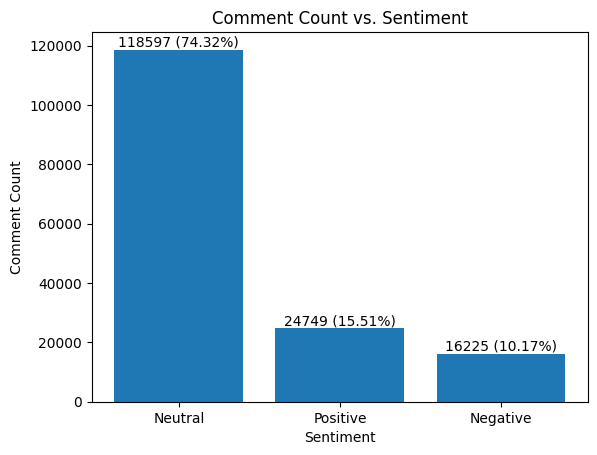

In [83]:
# sample data
categories = df['sentiment'].unique().tolist()
values = df['sentiment'].value_counts().tolist()

# calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# plot the bar graph
fig, ax = plt.subplots()
ax.bar(categories, values)
ax.set_title('Comment Count vs. Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comment Count')

# add percentages as annotations above each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(i, value), ha='center', va='bottom')

plt.show()

#### - Comment Classifier

In [84]:
df.columns[2:8]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

number of rows that have 1 in more that 1 category eg. comment id:0002bcb3da6cb337 under toxic,severe toxic,obscene,insult

In [85]:
len(df[(df.iloc[:, 2:8] == 1).sum(axis=1) > 1])

9865

In [86]:
count = df[df.columns[2:8]].sum()
perc = df[df.columns[2:8]].sum()/len(df[df['sentiment']=='Negative'])
pd.DataFrame({'counts': count, 'percentages': perc})

counts  percentages
toxic           15294     0.942619
severe_toxic     1595     0.098305
obscene          8449     0.520740
threat            478     0.029461
insult           7877     0.485485
identity_hate    1405     0.086595

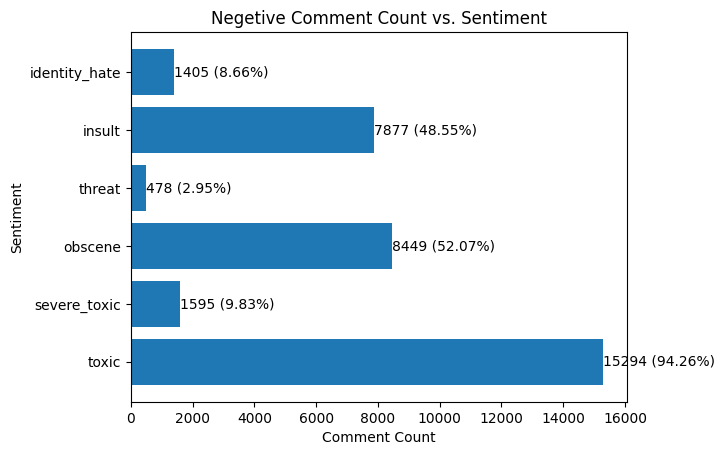

In [87]:
# sample data
categories = df.columns[2:8].tolist()
values = df[df.columns[2:8]].sum().tolist()

# calculate percentages
total = len(df[df['sentiment']=='Negative'])
percentages = [(value / total) * 100 for value in values]

# plot the horizontal bar graph
fig, ax = plt.subplots()
ax.barh(categories, values)
ax.set_title('Negetive Comment Count vs. Sentiment')
ax.set_xlabel('Comment Count')
ax.set_ylabel('Sentiment')

# add percentages as annotations to the right of each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(value, i), ha='left', va='center')

plt.show()

### Length of comment fall under
- Sentiment: Negative, Neutral and Positive
- comment classifier: toxic, severe_toxic, obscene, threat, insult, identity_hate

#### - Sentiment

In [88]:
#add word_count column
df['word_count'] = df['comment_text'].apply(lambda x: len(x.split()))

In [89]:
categories=df['sentiment'].unique().tolist()
category_word_count= []
for i in categories:
    category_word_count.append(int(df.loc[df['sentiment'] == i, ['word_count']].sum()))

pd.DataFrame({'categories': categories, 'word_count': category_word_count})

categories  word_count
0    Neutral     8543469
1   Positive     1332116
2   Negative      855544

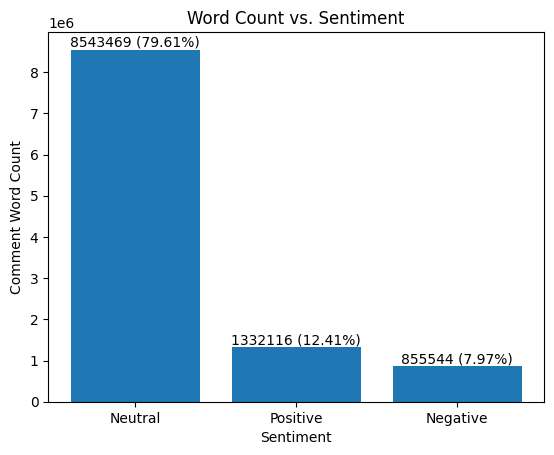

In [90]:
values = category_word_count

# calculate percentages
total = sum(values)
percentages = [(value / total) * 100 for value in values]

# plot the bar graph
fig, ax = plt.subplots()
ax.bar(categories, values)
ax.set_title('Word Count vs. Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comment Word Count')

# add percentages as annotations above each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(i, value), ha='center', va='bottom')

#### - Comment Classifier

In [91]:
categories=df.columns[2:8].tolist()
category_word_count= []
for i in categories:
    category_word_count.append(int(df.loc[df[i] == 1, ['word_count']].sum()))

pd.DataFrame({'categories': categories, 'word_count': category_word_count})

categories  word_count
0          toxic      784564
1   severe_toxic      120630
2        obscene      418879
3         threat       26432
4         insult      380354
5  identity_hate       73131

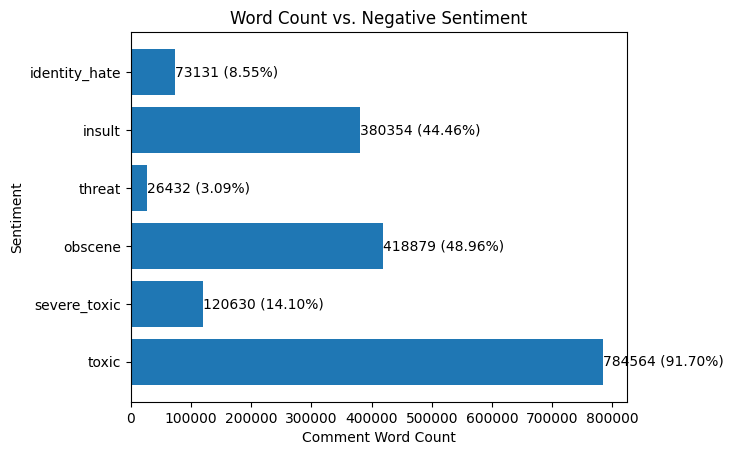

In [92]:
# sample data
values = category_word_count

# calculate percentages
total = int(df.loc[df['sentiment'] == 'Negative', ['word_count']].sum())
percentages = [(value / total) * 100 for value in values]

# plot the horizontal bar graph
fig, ax = plt.subplots()
ax.barh(categories, values)
ax.set_title('Word Count vs. Negative Sentiment')
ax.set_xlabel('Comment Word Count')
ax.set_ylabel('Sentiment')

# add percentages as annotations to the right of each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(value, i), ha='left', va='center')

plt.show()

### Average Length of comment
- Sentiment: Negative, Neutral and Positive
- comment classifier: toxic, severe_toxic, obscene, threat, insult, identity_hate

#### - Sentiment

In [93]:
categories=df['sentiment'].unique().tolist()
category_word_count= []
for i in categories:
    category_word_count.append(round(int(df.loc[df['sentiment'] == i, ['word_count']].sum())/len(df.loc[df['sentiment'] == i]),2))

pd.DataFrame({'categories': categories, ' word_count': category_word_count})

categories   word_count
0    Neutral        72.04
1   Positive        53.83
2   Negative        52.73

In [94]:
#average word count for all sentiment
round(df['word_count'].sum()/len(df),2)

67.25

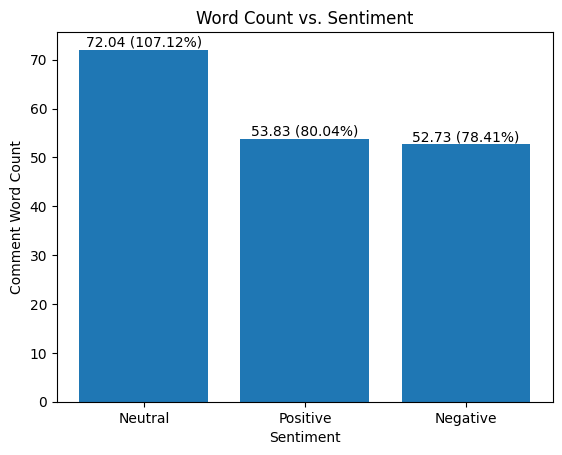

In [95]:
values = category_word_count

# calculate percentages
total = df['word_count'].sum()/len(df)
percentages = [(value / total) * 100 for value in values]

# plot the bar graph
fig, ax = plt.subplots()
ax.bar(categories, values)
ax.set_title('Word Count vs. Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comment Word Count')

# add percentages as annotations above each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(i, value), ha='center', va='bottom')

#### - Comment Classifier

In [96]:
categories=df.columns[2:8].tolist()
category_word_count= []
for i in categories:
    category_word_count.append(round(int(df.loc[df[i] == 1, ['word_count']].sum())/len(df.loc[df[i] == 1]),2))

pd.DataFrame({'categories': categories, 'word_count': category_word_count})

categories  word_count
0          toxic       51.30
1   severe_toxic       75.63
2        obscene       49.58
3         threat       55.30
4         insult       48.29
5  identity_hate       52.05

In [97]:
#average word count for negative comment
round(int(df.loc[df['sentiment'] == 'Negative', ['word_count']].sum())/len(df.loc[df['sentiment'] == 'Negative']),2)

52.73

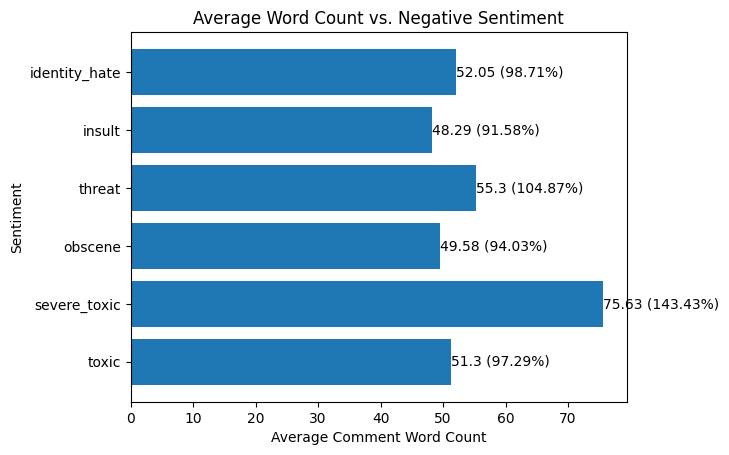

In [98]:
# sample data
values = category_word_count

# calculate percentages
total = int(df.loc[df['sentiment'] == 'Negative', ['word_count']].sum())/len(df.loc[df['sentiment'] == 'Negative'])
percentages = [(value / total) * 100 for value in values]

# plot the horizontal bar graph
fig, ax = plt.subplots()
ax.barh(categories, values)
ax.set_title('Average Word Count vs. Negative Sentiment')
ax.set_xlabel('Average Comment Word Count')
ax.set_ylabel('Sentiment')

# add percentages as annotations to the right of each bar
for i, value in enumerate(values):
    ax.annotate(f'{value} ({percentages[i]:.2f}%)', xy=(value, i), ha='left', va='center')

plt.show()

### WordCloud: Frequently Used words in individual category
- Sentiment: Negative, Neutral and Positive
- comment classifier: toxic, severe_toxic, obscene, threat, insult, identity_hate

#### - Sentiment

In [11]:
#Split dataset into 6 categories: Positive, Neutral, Negative
df_positive = df.loc[df['sentiment'] == 'Positive', ['id', 'comment_text', 'sentiment']]
df_neutral = df.loc[df['sentiment'] == 'Neutral', ['id', 'comment_text', 'sentiment']]
df_negative = df.loc[df['sentiment'] == 'Negative', ['id', 'comment_text', 'sentiment']]

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

def wordcloud(df, label):
    subset=df
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

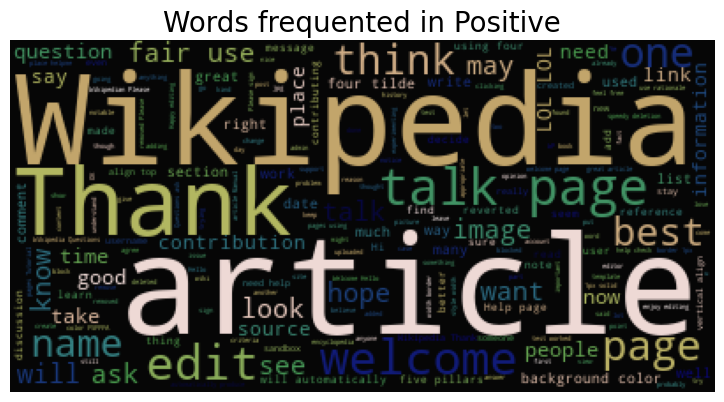

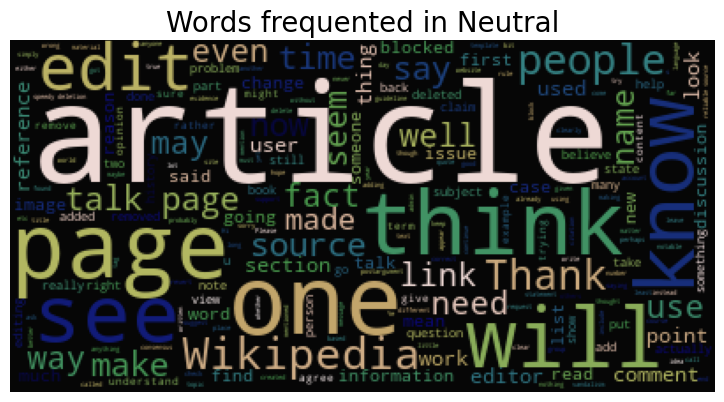

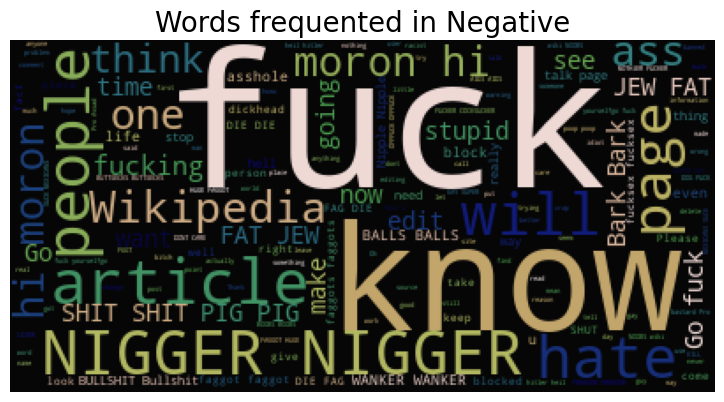

In [100]:
category_df=[df_positive,df_neutral,df_negative]

for i in range(len(category_df)):
    wordcloud(category_df[i],','.join(category_df[i]['sentiment'].unique()))

#### - Comment Classifier

In [101]:
#Split dataset into 6 categories: toxic, severe_toxic, obscene, threat, insult, and identity_hate. df_category stucture = {id,comment,categotry}
df_toxic = df.loc[:,['id','comment_text','toxic']]
df_severe = df.loc[:,['id','comment_text','severe_toxic']]
df_obscene = df.loc[:,['id','comment_text','obscene']]
df_threat = df.loc[:,['id','comment_text','threat']]
df_insult = df.loc[:,['id','comment_text','insult']]
df_hate = df.loc[:,['id','comment_text','identity_hate']]

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

def wordcloud(df, label):
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

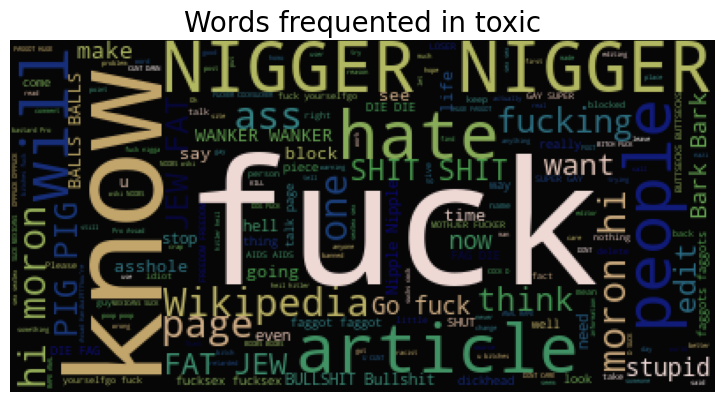

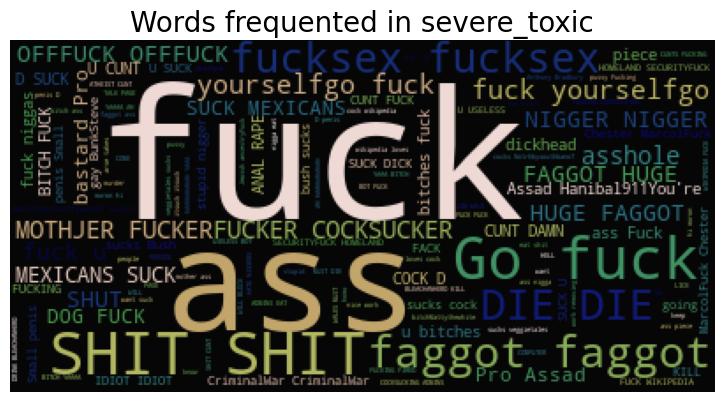

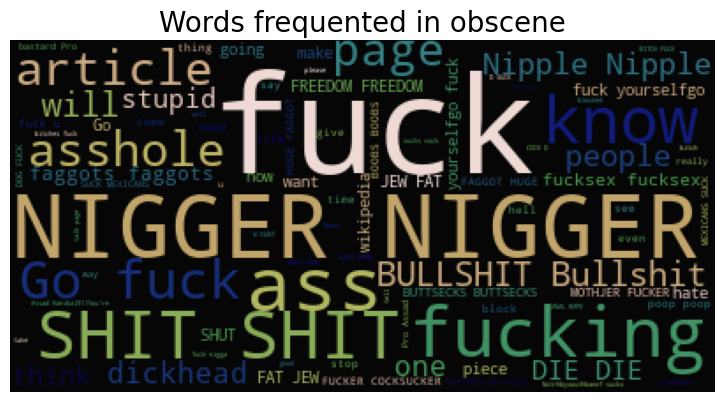

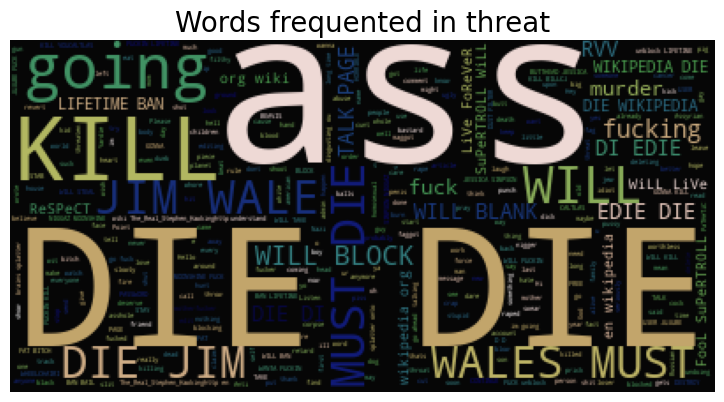

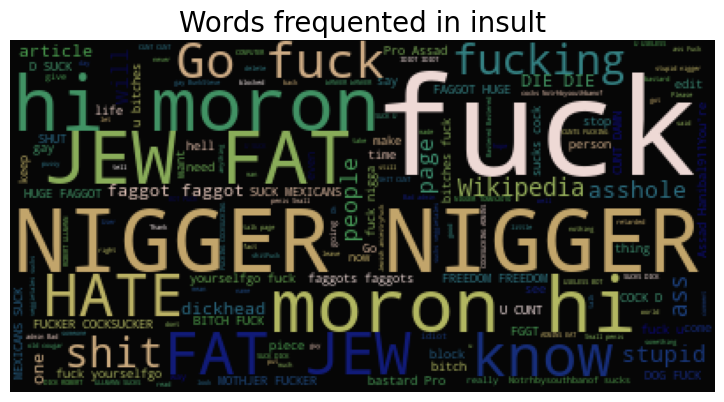

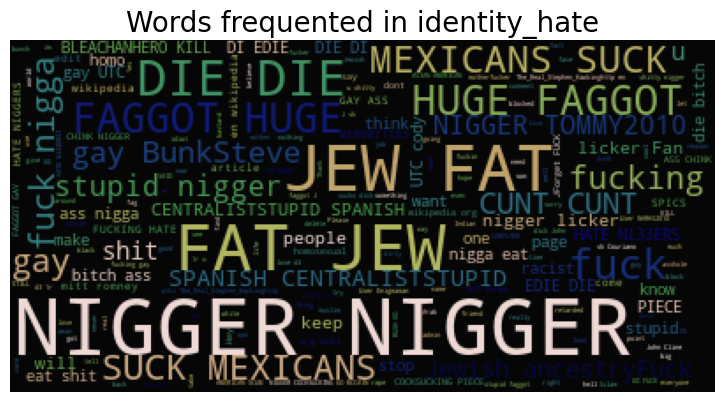

In [102]:
category_df=[df_toxic,df_severe,df_obscene,df_threat,df_insult,df_hate]

for i in range(len(category_df)):
    wordcloud(category_df[i],category_df[i].columns[2])

### Network graph: Frequently used words in all category

In [6]:
# # Filter data to only include comments labeled as all categories
all_categories_data = df[(df['toxic'] == 1) &
                         (df['severe_toxic'] == 1) &
                         (df['obscene'] == 1) &
                         (df['threat'] == 1) &
                         (df['insult'] == 1) &
                         (df['identity_hate'] == 1)]


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
import networkx as nx
from collections import Counter
import nltk
from nltk.corpus import words
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('vader_lexicon')
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spacy model
nlp = spacy.load('en_core_web_sm')

# Load the stop words for English
stop_words = nltk.corpus.stopwords.words('english')

# Get all words in WordNet
all_words = words.words()


# Initialize an instance of TextBlob's sentiment analyzer
sentiment_analyzer = TextBlob('')

# Initialize an instance of VADER's sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Create a list of words to exclude based on their sentiment polarity
exclude_words = [word for word in all_words if sentiment_analyzer.sentiment.polarity >= 0 or vader_analyzer.polarity_scores(word)['compound'] >= 0 or nlp(word)[0].sentiment >= 0]

# Add stop words to the exclude_words list
exclude_words += stop_words

# Add non-alphabetic characters from ASCII to the exclude_words list
exclude_words += [chr(i) for i in range(128) if not chr(i).isalpha()]

# Add punctuation marks to the exclude_words list
exclude_words += list(string.punctuation)


In [10]:
# Concatenate all comments into a single string
all_comments = ' '.join(all_categories_data['comment_text'])

# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower()
         not in exclude_words and word.isalpha()]

# Calculate the frequency of each word
word_freq = Counter(words)


In [106]:
# Get the top 50 most common words
top_words = [word[0] for word in word_freq.most_common(50)]

# Create a dictionary to store co-occurrence counts
co_occur_dict = {}

# Loop through each comment in the data
for comment in all_categories_data['comment_text']:
    # Split the comment into individual words
    comment_words = comment.split()
    # Loop through each pair of words in the comment
    for i in range(len(comment_words)):
        for j in range(i+1, len(comment_words)):
            # Check if both words are in the top 50 most common words
            if comment_words[i] in top_words and comment_words[j] in top_words:
                # Increment the co-occurrence count for the pair of words
                pair = tuple(sorted([comment_words[i], comment_words[j]]))
                if pair in co_occur_dict:
                    co_occur_dict[pair] += 1
                else:
                    co_occur_dict[pair] = 1


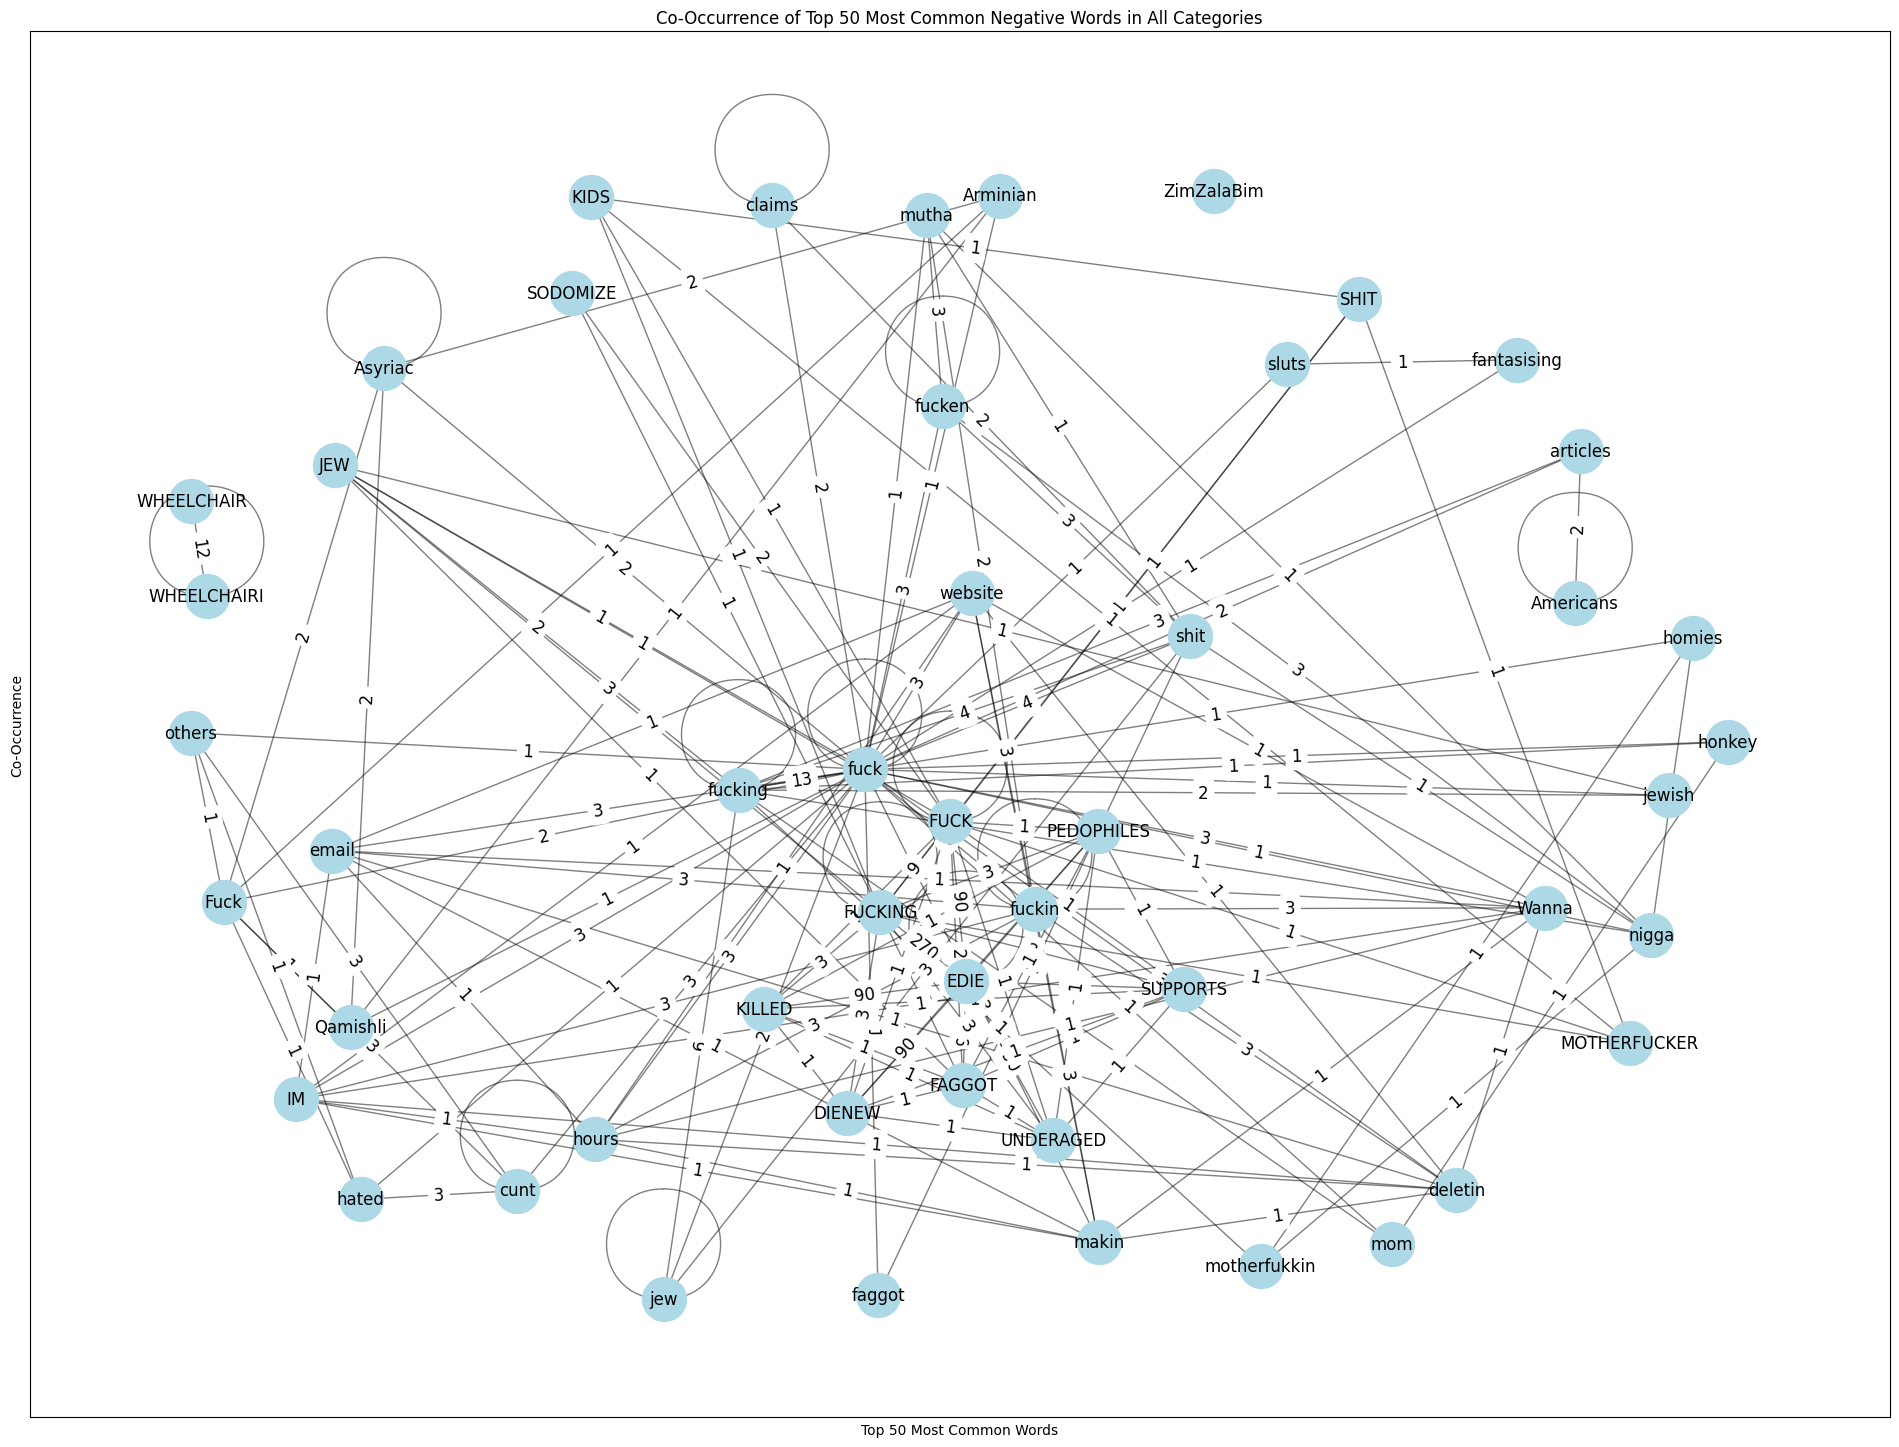

In [107]:
# Create an empty graph
G = nx.Graph()

# Add nodes
for word in top_words:
    G.add_node(word)

# Add edges
for pair, weight in co_occur_dict.items():
    node1, node2 = pair
    G.add_edge(node1, node2, weight=weight)

# Set the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=2, iterations=50)

fig, ax = plt.subplots(figsize=(24, 18))

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', ax=ax)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', ax=ax)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=edge_labels, font_size=12, ax=ax)

ax.set_xlabel('Top 50 Most Common Words')
ax.set_ylabel('Co-Occurrence')
ax.set_title('Co-Occurrence of Top 50 Most Common Negative Words in All Categories')

plt.show()


### Words that uniquely exist in individual category
- Sentiment: Negative, Neutral and Positive
- comment classifier: toxic, severe_toxic, obscene, threat, insult, identity_hate

#### - Sentiment

In [90]:
import re
nlp = spacy.load('en_core_web_md')
stop_words = nltk.corpus.stopwords.words('english')

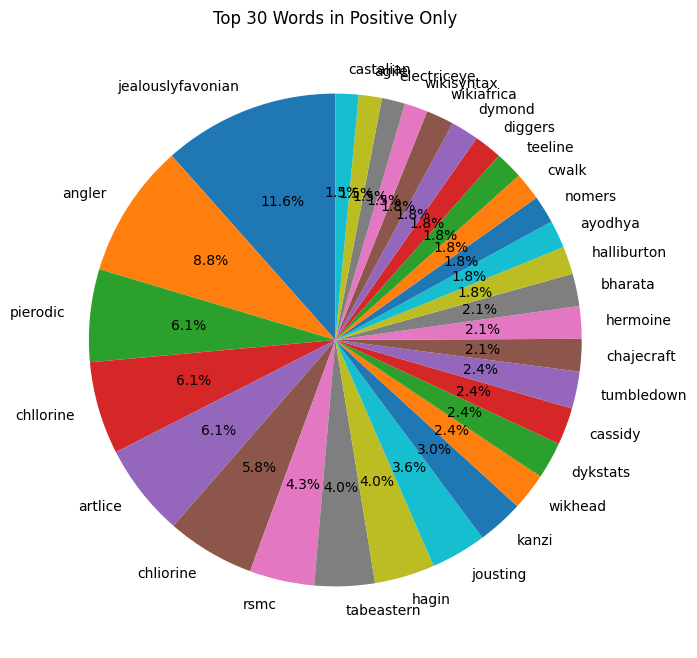

In [137]:
#common words that are positive sentiments
data_sentiment = df.loc[df['sentiment'] == 'Positive']
data_other= df.loc[df['sentiment'] != 'Positive']

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Positive Only")

# Show the chart
plt.show()

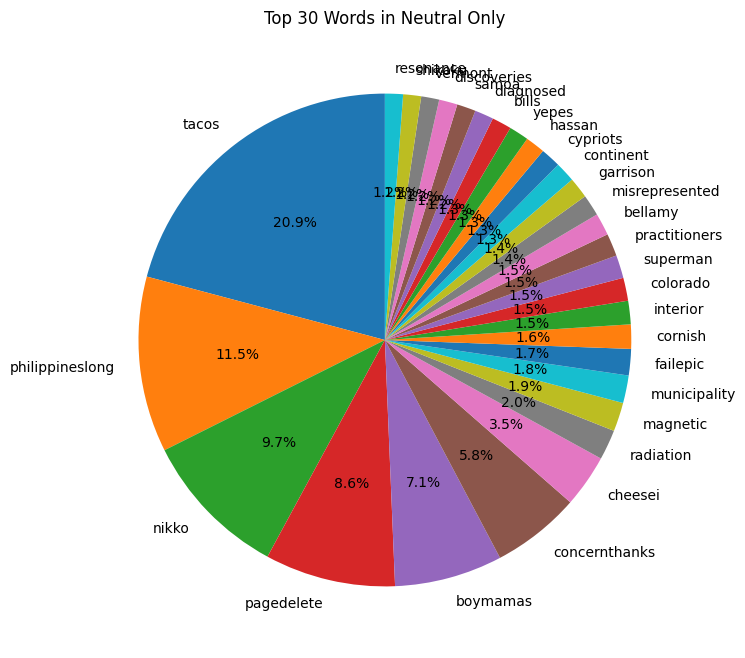

In [136]:
#common words that are Neutral sentiments
data_sentiment = df.loc[df['sentiment'] == 'Neutral']
data_other= df.loc[df['sentiment'] != 'Neutral']

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Neutral Only")

# Show the chart
plt.show()

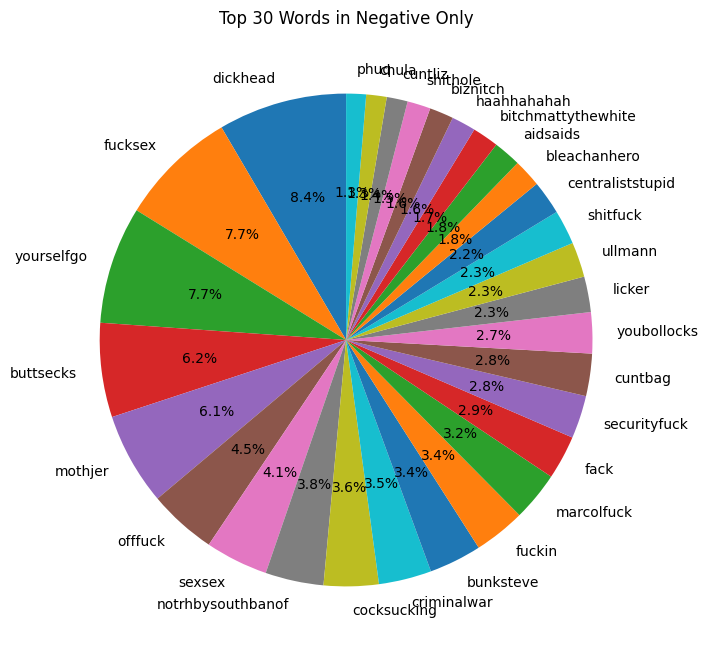

In [151]:
#common words that are positive sentiments
data_sentiment = df.loc[df['sentiment'] == 'Negative']
data_other= df.loc[df['sentiment'] != 'Negative']

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Negative Only")

# Show the chart
plt.show()

#### - Comment Classifier

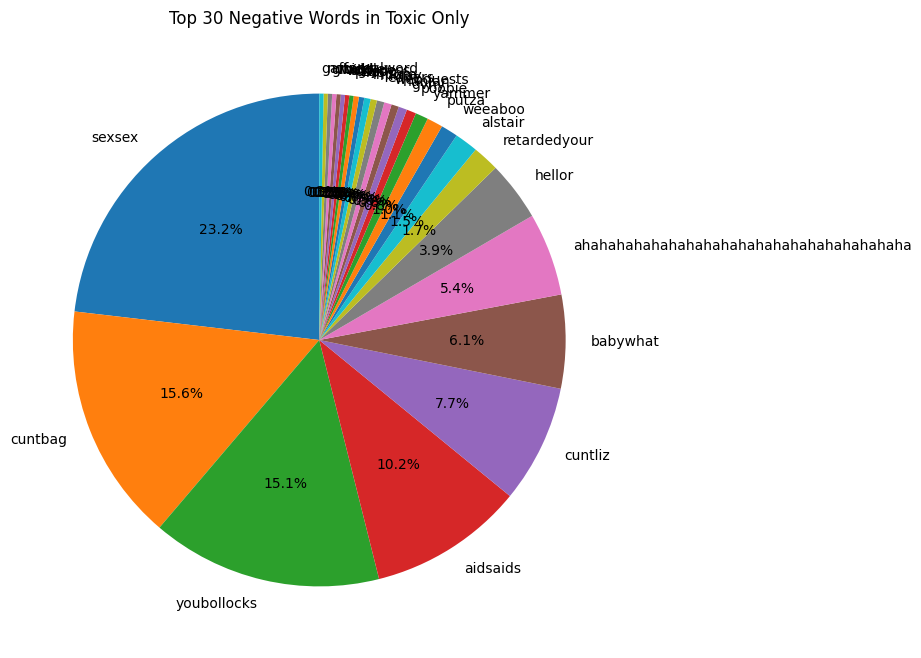

In [220]:
#common words that are positive sentiments
data_sentiment = df.loc[(df['toxic'] == 1) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
data_other= df.loc[df['toxic'] == 0]

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Toxic Only")

# Show the chart
plt.show()

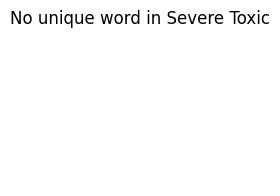

In [222]:
#common words that are positive sentiments
data_sentiment = df.loc[(df['toxic'] == 0) & (df['severe_toxic'] == 1) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
data_other= df.loc[df['severe_toxic'] == 0]

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(4, 2))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
if len(unique_word) == 0:
    ax.set_title("No unique word in Severe Toxic")
else:
    ax.set_title("Top 30 Words in Severe Toxic Only")

# Show the chart
plt.show()

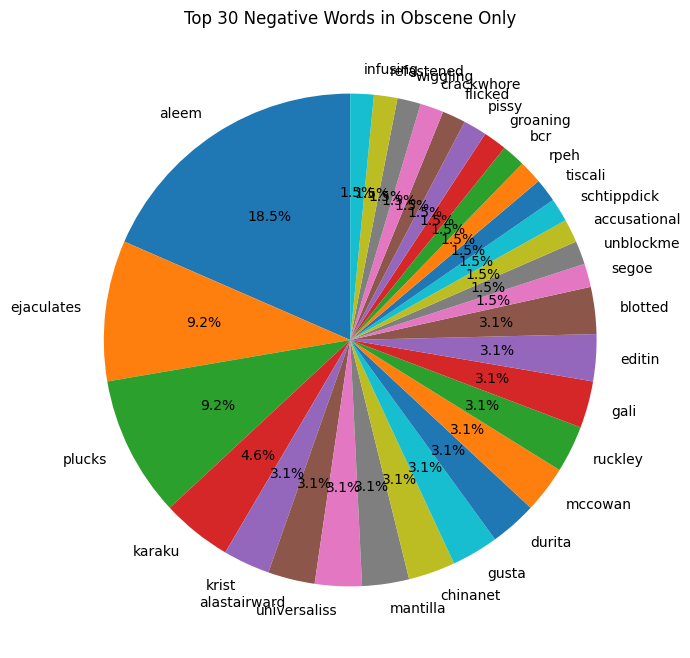

In [214]:
#common words that are positive sentiments
data_sentiment = df.loc[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 1) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
data_other= df.loc[df['obscene'] == 0]

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Obscene Only")

# Show the chart
plt.show()

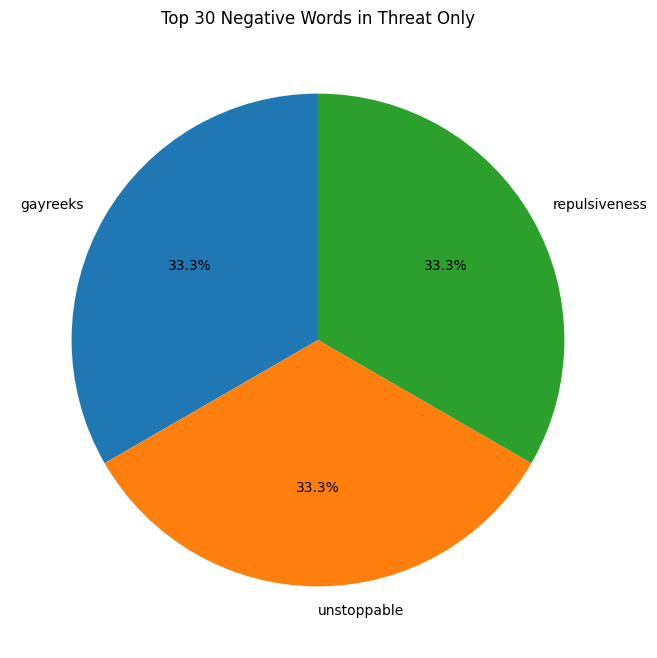

In [213]:
#common words that are positive sentiments
data_sentiment = df.loc[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 1) & (df['insult'] == 0) & (df['identity_hate'] == 0)]
data_other= df.loc[df['threat'] == 0]

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Threat Only")

# Show the chart
plt.show()

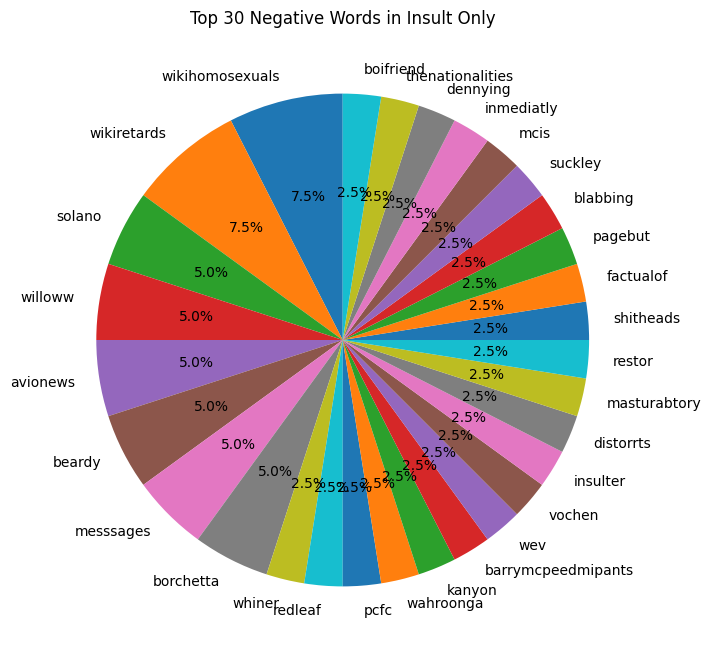

In [212]:
#common words that are positive sentiments
data_sentiment = df.loc[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 1) & (df['threat'] == 0) & (df['insult'] == 1) & (df['identity_hate'] == 0)]
data_other= df.loc[df['insult'] == 0]

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Insult Only")

# Show the chart
plt.show()

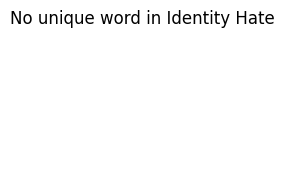

In [223]:
#common words that are positive sentiments
data_sentiment = df.loc[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 1) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 1)]
data_other= df.loc[df['identity_hate'] == 0]

# Concatenate all comments into a single string
comment_sentiment = ' '.join(data_sentiment['comment_text'])
comment_other = ' '.join(data_other['comment_text'])

# Remove special characters from the list of words
words_sentiment = [re.sub(r'[^\w\s]','',word.lower()) for word in comment_sentiment.split() if word.lower() not in stop_words and word.isalpha()]
words_other = set([re.sub(r'[^\w\s]','',word.lower()) for word in comment_other.split() if word.lower() not in stop_words and word.isalpha()])

# Split the string into individual words, excluding words in the exclusion list
unique_word = [word for word in words_sentiment if word not in words_other]

# Convert the set of unique words back to a list
unique_words = list(unique_word)

# get the list of English words from nltk.download('words')
#english_words = set(nltk.corpus.words.words())

# Remove words that are not in the English dictionary
#unique_words =  [word for word in unique_words if word in english_words]

# Count the frequency of each word in the list
word_counts = Counter(unique_words)

# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 2))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
if len(unique_word) == 0:
    ax.set_title("No unique word in Identity Hate")
else:
    ax.set_title("Top 30 Words in Identity Hate Only")

# Show the chart
plt.show()

### Here is a reason why there is no graph here, 
### Co-occurance matrix to show which categories go together

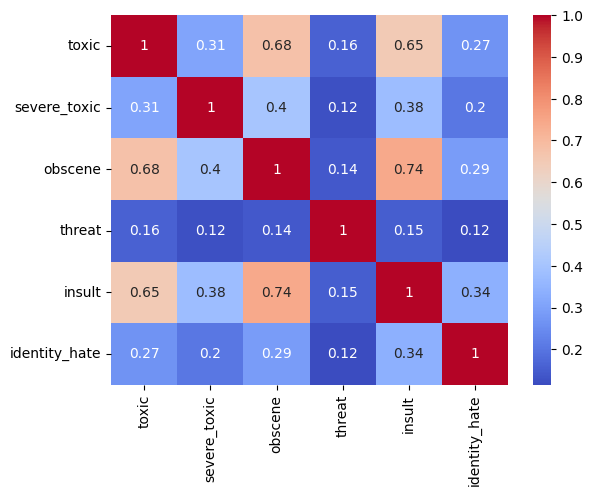

In [113]:
# Create a new DataFrame that only contains the category columns
categories_df = df[['toxic', 'severe_toxic',
                    'obscene', 'threat', 'insult', 'identity_hate']]

# Calculate the correlation matrix
corr_matrix = categories_df.corr()

# Create a heatmap of the correlation matrix
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the chart
plt.show()


according to this heatmap, severe_toxic has the lowest correlation, so it justifies why there might not be any graph here

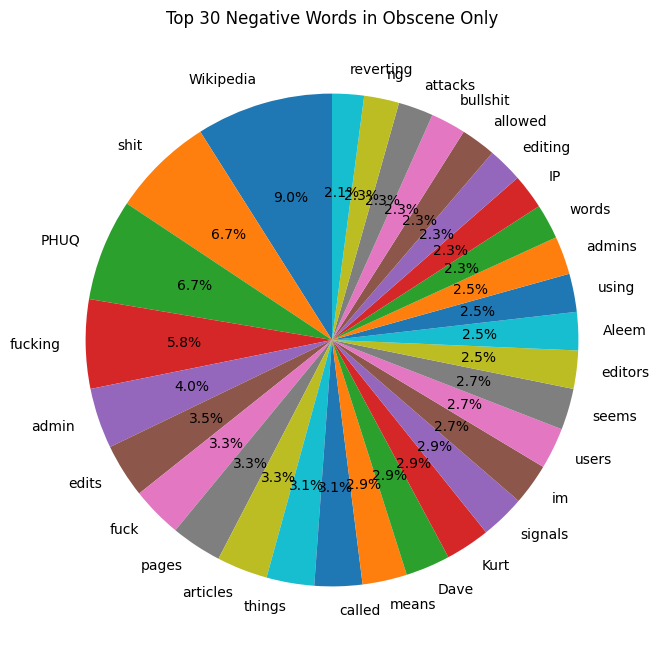

In [114]:
# Common obscene words that dont fall under other category
data_obscene = df[(df['toxic'] == 0) &
                  (df['severe_toxic'] == 0) &
                  (df['obscene'] == 1) &
                  (df['threat'] == 0) &
                  (df['insult'] == 0) &
                  (df['identity_hate'] == 0)]


# Concatenate all comments into a single string
all_comments = ' '.join(data_obscene['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower()
         not in exclude_words and word.isalpha()]

# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Obscene Only")

# Show the chart
plt.show()


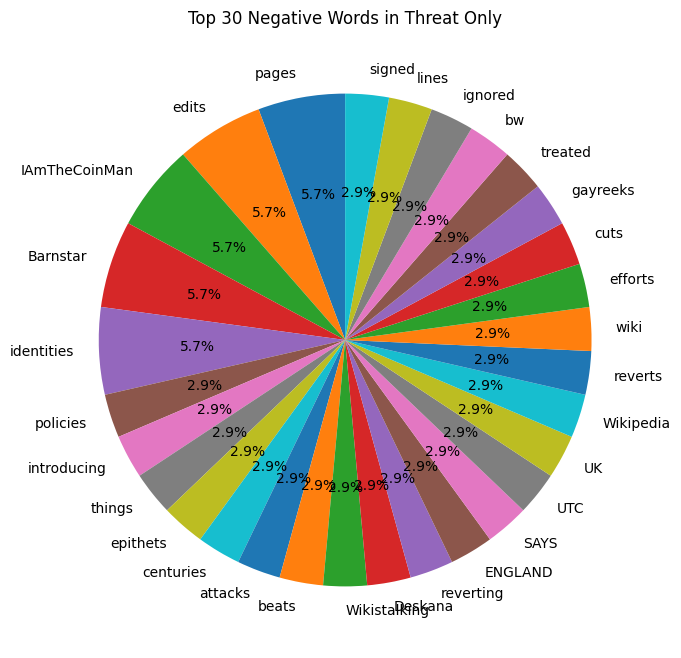

In [115]:
# Filter data to only include comments labeled in threat only 
data_threat = df[(df['toxic'] == 0) &
                 (df['severe_toxic'] == 0) &
                 (df['obscene'] == 0) &
                 (df['threat'] == 1) &
                 (df['insult'] == 0) &
                 (df['identity_hate'] == 0)]


# Concatenate all comments into a single string
all_comments = ' '.join(data_threat['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower()
         not in exclude_words and word.isalpha()]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Threat Only")

# Show the chart
plt.show()


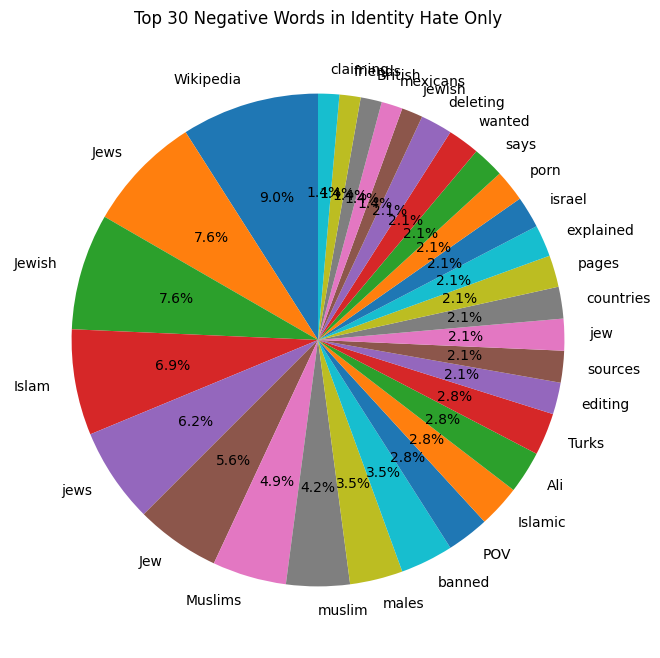

In [116]:
# Filter data to only include comments labeled in identity only
data_identity_hate = df[(df['toxic'] == 0) &
                        (df['severe_toxic'] == 0) &
                        (df['obscene'] == 0) &
                        (df['threat'] == 0) &
                        (df['insult'] == 0) &
                        (df['identity_hate'] == 1)]


# Concatenate all comments into a single string
all_comments = ' '.join(data_identity_hate['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower()
         not in exclude_words and word.isalpha()]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Identity Hate Only")

# Show the chart
plt.show()


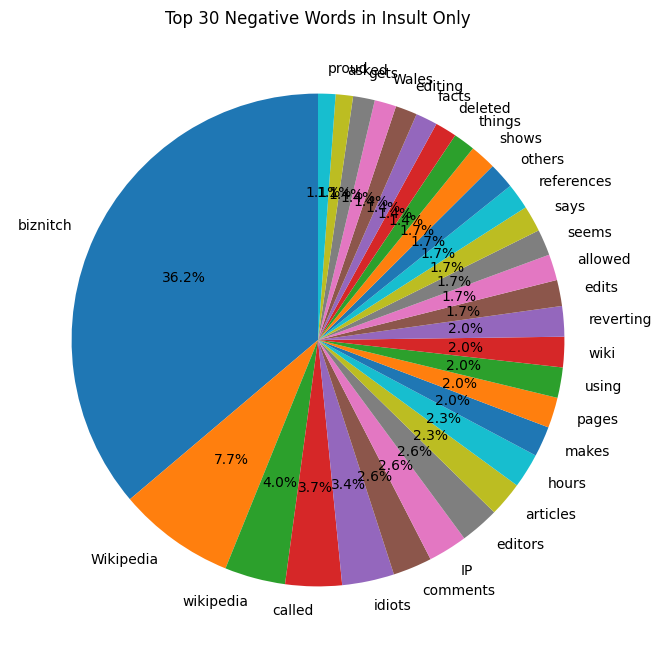

In [117]:
# Filter data to only include comments labeled in insult only
data_insult = df[(df['toxic'] == 0) &
                 (df['severe_toxic'] == 0) &
                 (df['obscene'] == 0) &
                 (df['threat'] == 0) &
                 (df['insult'] == 1) &
                 (df['identity_hate'] == 0)]


# Concatenate all comments into a single string
all_comments = ' '.join(data_insult['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower()
         not in exclude_words and word.isalpha()]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Negative Words in Insult Only")

# Show the chart
plt.show()


## Machine Learning

### Data Preparation


In [118]:
# Texttectorization map text to interger sequence and dataset preparation for machine Learning
from tensorflow.keras.layers import TextVectorization

In [119]:
X = df['comment_text']
y = df[df.columns[2:8]].values

In [120]:
# Max Number of words in the comment_text < TextVectorization output_sequence_length
max(X.apply(lambda x: len(x.split())))

1411

In [121]:
# Number of words in the vocab
MAX_WORDS = 200000 

# initialize TextVectorizer
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,
                               output_mode='int')

In [122]:
vectorizer.adapt(X.values)

# map all comment text words to integer sequence
vectorized_text = vectorizer(X.values)

vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  646,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2493, ...,     0,     0,     0],
       [  424,   436,    70, ...,     0,     0,     0],
       ...,
       [32270,  7411,   382, ...,     0,     0,     0],
       [    5,    12,   535, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [123]:
# create tensorflow data pipeline
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [124]:
dataset.as_numpy_iterator().next()

(array([[    16,      6,    145, ...,      0,      0,      0],
        [100555,   3014,      9, ...,      0,      0,      0],
        [   185,    286,      5, ...,      0,      0,      0],
        ...,
        [   139,      7,      7, ...,      0,      0,      0],
        [    12,      9,    519, ...,      0,      0,      0],
        [    40,      2,    741, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [125]:
# Train 70% Test 10% valuate 20%
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

### Create Model

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding   #layers to build up deep neural network

In [127]:
# Create NN model
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_WORDS+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer map to 6 classifier
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 6)                 774       
                                                      

### Model Training

In [129]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3
6981/6981 [==============================] - 5699s 816ms/step - loss: 0.0630 - accuracy: 0.9818 - val_loss: 0.0499 - val_accuracy: 0.9948
Epoch 2/3
6981/6981 [==============================] - 5511s 789ms/step - loss: 0.0456 - accuracy: 0.9934 - val_loss: 0.0401 - val_accuracy: 0.9952
Epoch 3/3
6981/6981 [==============================] - 5681s 814ms/step - loss: 0.0407 - accuracy: 0.9893 - val_loss: 0.0410 - val_accuracy: 0.9946


<Figure size 800x500 with 0 Axes>

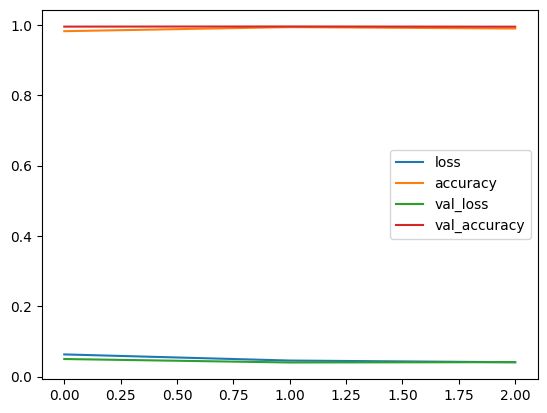

In [130]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### Make Predictions

In [131]:
input_text = vectorizer('You freaking suck!')
res = model.predict(np.expand_dims(input_text,0))

(res > 0.5).astype(int)
#toxic	severe_toxic    obscene     threat	insult	identity_hate    
# [1    , 0             , 1         ,0      ,1      ,    0          ] res falls under toxic & obscene & insult

1/1 [==============================] - 1s 1s/step


array([[1, 0, 1, 0, 1, 0]])

In [132]:
batch_X, batch_y = test.as_numpy_iterator().next()

# predict test dataset
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 155ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

### Evaluate Model

In [133]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [134]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [135]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 118ms/step


In [136]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.865487813949585, Recall:0.7669278383255005, Accuracy:0.49448344111442566


#### create demo for Model

In [138]:
%pip install gradio jinja2
import gradio as gr

     ---------------------------------------- 17.3/17.3 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 75.3/75.3 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 45.7/45.7 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 286.2/286.2 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 200.1/200.1 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 319.8/319.8 kB 6.6 MB/s eta 0:00:00
     -------------------------------------- 197.1/197.1 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 124.5/124.5 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 50.5/50.5 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 57.8/57.8 kB ? eta 0:00:00
     ---------------------------------------- 5

c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [139]:
#model.save('toxicity.h5')
model = tf.keras.models.load_model('toxicity.h5')

In [140]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [141]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [142]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://b9e95811851bd2e606.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 1s 1s/step


Traceback (most recent call last):
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\routes.py", line 401, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1302, in process_api
    result = await self.call_function(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1025, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backe

1/1 [==============================] - 0s 106ms/step


Traceback (most recent call last):
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\routes.py", line 401, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1302, in process_api
    result = await self.call_function(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1025, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backe

1/1 [==============================] - 0s 115ms/step


Traceback (most recent call last):
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\routes.py", line 401, in run_predict
    output = await app.get_blocks().process_api(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1302, in process_api
    result = await self.call_function(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\gradio\blocks.py", line 1025, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "c:\Users\65982\AppData\Local\Programs\Python\Python310\lib\site-packages\anyio\_backe